# eICU Database Classification #

Using the patient dataset from a demo version of the eICU dataset, we'll attempt to create a neural network which can be used for predict whether or not a patient will be alive or not in their hospital discharge status.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv("patient.csv")

In [3]:
df.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141764,129391,Female,87,Caucasian,59,91,NaN,157.5,23:36:00,...,ICU to SDU,2,stepdown/other,NaN,NaN,18:58:00,344,Home,Alive,002-1039
1,141765,129391,Female,87,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,...,Emergency Department,1,admit,46.5,45.0,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039
2,143870,131022,Male,76,Caucasian,68,103,"Endarterectomy, carotid",167.0,20:46:00,...,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289
3,144815,131736,Female,34,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,...,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116
4,145427,132209,Male,61,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,...,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243


In [4]:
df.columns #the dataframe contains a lot of unique ID numbers which won't be of any use for our ML model

Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

In [5]:
df.drop(["patientunitstayid","patienthealthsystemstayid","hospitalid","wardid","uniquepid"],axis=1,inplace=True)

In [6]:
df["hospitaldischargestatus"].unique() 
#we can classify patients into being discharged as either alive or not

array(['Alive', 'Expired', nan], dtype=object)

In [7]:
df["hospitaldischargestatus"] = df["hospitaldischargestatus"].map({"Alive":1, "Expired":0})

In [8]:
df.head()

,gender,age,ethnicity,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,...,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus
0,Female,87,Caucasian,NaN,157.5,23:36:00,-2258,NaN,2015,19:20:00,...,13:14:00,ICU to SDU,2,stepdown/other,NaN,NaN,18:58:00,344,Home,Alive
1,Female,87,Caucasian,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,NaN,2015,19:20:00,...,23:44:00,Emergency Department,1,admit,46.5,45.0,13:14:00,2250,Step-Down Unit (SDU),Alive
2,Male,76,Caucasian,"Endarterectomy, carotid",167.0,20:46:00,-1,Operating Room,2014,17:05:00,...,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive
3,Female,34,Caucasian,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,...,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive
4,Male,61,Caucasian,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,...,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive


### Exploratory Data Analysis ###

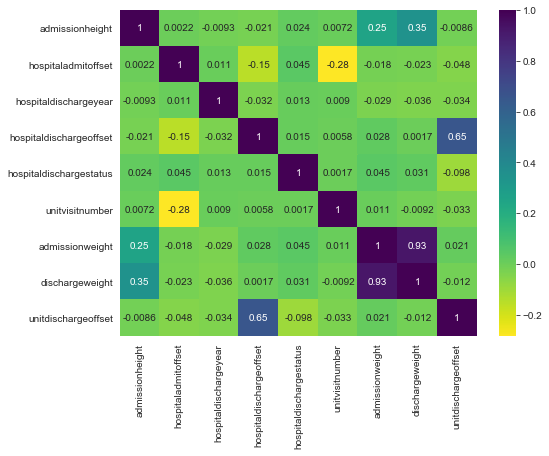

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis_r") 
#very few columns within the dataframe any significant positive correlation between one another
#let's explore in more detail if any columns show any correlation specifically with the hospital discharge status

In [10]:
df.corr()["hospitaldischargestatus"].sort_values(ascending=False)
#none of these numeric data columns have a strong correlation with discharge status, so these won't be of much use to us

hospitaldischargestatus    1.000000
hospitaladmitoffset        0.045307
admissionweight            0.044651
dischargeweight            0.030645
admissionheight            0.024449
hospitaldischargeoffset    0.015417
hospitaldischargeyear      0.012982
unitvisitnumber            0.001746
unitdischargeoffset       -0.097640
Name: hospitaldischargestatus, dtype: float64

In [11]:
df.describe().transpose() #there appears to be some very strange values for height and weight, let's explore this in more detail

,count,mean,std,min,25%,50%,75%,max
admissionheight,2451.0,169.740445,15.986092,0.3,162.600,170.20,177.80,600.0
hospitaladmitoffset,2520.0,-2017.725794,7217.011876,-251404.0,-1173.250,-270.00,-92.00,8696.0
hospitaldischargeyear,2520.0,2014.522222,0.499605,2014.0,2014.000,2015.00,2015.00,2015.0
hospitaldischargeoffset,2520.0,8026.446429,9352.901755,20.0,2606.500,5474.50,9996.75,143016.0
hospitaldischargestatus,2492.0,0.914928,0.279045,0.0,1.000,1.00,1.00,1.0
unitvisitnumber,2520.0,1.200000,0.510003,1.0,1.000,1.00,1.00,5.0
admissionweight,2322.0,83.087795,26.606384,0.5,65.500,79.30,96.60,515.0
dischargeweight,1236.0,83.051586,26.465304,22.3,64.275,79.55,98.40,242.0
unitdischargeoffset,2520.0,3484.075000,4977.160994,0.0,1137.750,2120.00,3998.50,66499.0


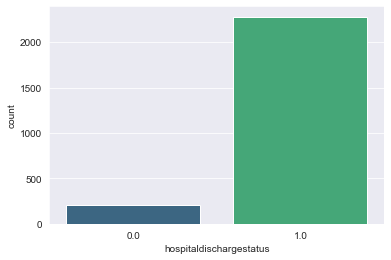

In [12]:
sns.countplot(df["hospitaldischargestatus"],palette="viridis")

In [13]:
100*df["hospitaldischargestatus"].value_counts()/len(df)

1.0    90.476190
0.0     8.412698
Name: hospitaldischargestatus, dtype: float64

<div class="alert-warning">

- The data is VERY imbalanced so f1 score and results for the 0 class will be much more useful than accuracy alone to evaluate our model performance.
- We should also expect that our model performs with at LEAST 90% accuracy as a result of this skew. 

In [14]:
df["age"].iplot(kind="hist",xTitle="Age")
#apart from 4 people aged under 18, all other patients are adults, mostly aged above 50

In [15]:
df["admissionheight"].iplot(kind="hist",xTitle="Admission Height") 
#most people are between 140-200cm tall, apart from a few very short people and a giant at 600cm tall!
#let's explore these outliers in more detail below

In [16]:
df["admissionheight"].sort_values().head() 
#we'll definitely need to do something with these outliers, 3 of these patients are short enough to break guiness world records!

1876     0.30
2053    15.20
2306    33.60
1861    58.80
1814    65.98
Name: admissionheight, dtype: float64

In [17]:
df["admissionheight"].sort_values(ascending=False).head() 
#apart from the giant at 600cm height, the rest of the admission heights seem a little more normal

432     600.0
907     204.5
1808    203.2
2201    203.2
1028    203.2
Name: admissionheight, dtype: float64

In [18]:
df["admissionweight"].iplot(kind="hist",xTitle="Admission Weight") 
#most people weight between 50 and 150kg which makes sense, let's again have a closer look at the outliers at either end

In [19]:
df["admissionweight"].sort_values().head()
#we appear to have someone that weighs less than 1kg!

424      0.5
1855    32.7
1292    33.0
1793    33.4
968     35.0
Name: admissionweight, dtype: float64

In [20]:
df["admissionweight"].sort_values(ascending=False).head()
#3 people weigh more than 200kg, seems a bit unrealistic to me, especially the person weighing over 500kg!

671     515.00
1906    293.93
249     227.70
1943    191.00
319     185.50
Name: admissionweight, dtype: float64

In [21]:
df["dischargeweight"].iplot(kind="hist",xTitle="Discharge Weight")
#we appear to have less extreme outliers here, suggesting there's either been misentry of data or VERY dramatic weight changes

In [22]:
df["dischargeweight"].sort_values().head()
#all of the people who weighed more than 30kg must have lost very significant amounts of weight for this to be true
#this seems very unlikely for this to have occurred in hospital care though

1128    22.3
1137    23.0
1118    23.6
1122    27.4
1126    28.3
Name: dischargeweight, dtype: float64

In [23]:
df["dischargeweight"].sort_values(ascending=False).head()
#there is no longer the person weighing 500kg, and the patient weighing 293kg would've lost 70kg from the look of this data
#this seems VERY unlikely to have happened in reality and is probably wrong data

177     242.0
249     227.5
2392    203.6
128     185.2
1296    181.9
Name: dischargeweight, dtype: float64

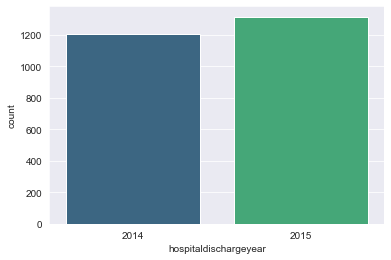

In [24]:
sns.countplot(df["hospitaldischargeyear"],palette="viridis")

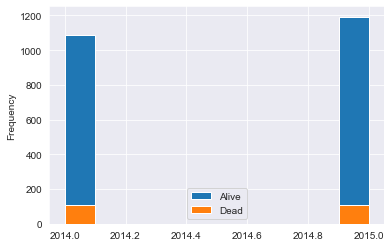

In [25]:
df[df["hospitaldischargestatus"]==1]["hospitaldischargeyear"].plot(kind="hist",label="Alive")
df[df["hospitaldischargestatus"]==0]["hospitaldischargeyear"].plot(kind="hist",label="Dead")
plt.legend()

In [26]:
df["hospitaladmitoffset"].iplot(kind="hist",xTitle="Hospital Admit Offset")
#most entries are between -10k and 0, apart from a few extreme values and a massive outlier at -250k
#there are also a few positive values which don't make sense because the values should all be negative

In [27]:
df["unitdischargeoffset"].iplot(kind="hist",xTitle="Unit Discharge Offset")
#most values are between 0-10k, and they're all positive which makes sense

In [28]:
df["hospitaldischargeoffset"].iplot(kind="hist",xTitle="Hospital Discharge Offset")
#most values are within 0-20k, and all values are positive which is as it should be

### Data Preprocessing ###

Let's see how many null entries our dataframe has, then we can replace or get rid of them accordingly.

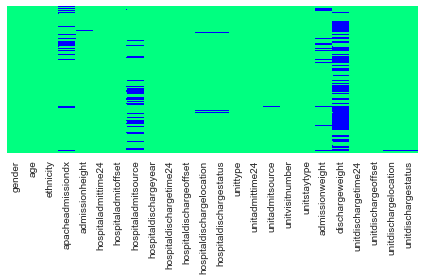

In [29]:
sns.heatmap(df.isnull(),cmap="winter_r",yticklabels=False,cbar=False)
plt.tight_layout() #quite a lot of the columns have null entries

In [30]:
df.isnull().sum().sort_values(ascending=False).head(13)
#returns number of null entries in dataframe

dischargeweight              1284
hospitaladmitsource           594
apacheadmissiondx             299
admissionweight               198
admissionheight                69
ethnicity                      39
hospitaldischargelocation      32
hospitaldischargestatus        28
unitadmitsource                22
age                             4
unitdischargelocation           4
gender                          4
unitdischargestatus             2
dtype: int64

In [31]:
(100*df.isnull().sum()/len(df)).sort_values(ascending=False).head(13)
#returns null entries as a percentage of the whole dataframe

dischargeweight              50.952381
hospitaladmitsource          23.571429
apacheadmissiondx            11.865079
admissionweight               7.857143
admissionheight               2.738095
ethnicity                     1.547619
hospitaldischargelocation     1.269841
hospitaldischargestatus       1.111111
unitadmitsource               0.873016
age                           0.158730
unitdischargelocation         0.158730
gender                        0.158730
unitdischargestatus           0.079365
dtype: float64

A lot of the columns with missing data only account for less than 2% of the total dataframe, so we can just drop them entirely.

In [32]:
df.dropna(subset=["admissionheight","ethnicity","hospitaldischargelocation","hospitaldischargestatus",
                  "unitadmitsource","age","unitdischargelocation","gender","unitdischargestatus"],inplace=True)

In [33]:
(100*df.isnull().sum()/len(df)).sort_values(ascending=False).head(13)

dischargeweight            50.885329
hospitaladmitsource        23.482293
apacheadmissiondx          10.792580
admissionweight             5.902192
unitdischargestatus         0.000000
hospitaldischargeoffset     0.000000
age                         0.000000
ethnicity                   0.000000
admissionheight             0.000000
hospitaladmittime24         0.000000
hospitaladmitoffset         0.000000
hospitaldischargeyear       0.000000
hospitaldischargetime24     0.000000
dtype: float64

In [34]:
df.corr()["admissionweight"].sort_values(ascending=False)

admissionweight            1.000000
dischargeweight            0.925695
admissionheight            0.250177
hospitaldischargestatus    0.044379
hospitaldischargeoffset    0.032398
unitdischargeoffset        0.021100
unitvisitnumber            0.009119
hospitaladmitoffset       -0.020165
hospitaldischargeyear     -0.023942
Name: admissionweight, dtype: float64

<div class="alert-info" >
     
- Since there are more null entries in discharge weight, we can't use that column to input any null values for the admission weight column.
- However, the admission height column now has no null entries and is fairly well correlated with admission weight, so we can use this column to input missing data into admission weight.
- Once we have then filled in the admission weight column, we can then use this column to fill in the empty values for the discharge weight column.

In [35]:
avg_admissionheight = df.groupby("admissionheight").mean()["admissionweight"].round(1) 
avg_admissionheight.head()

admissionheight
0.30      74.1
15.20     70.9
33.60     97.2
58.80    110.1
65.98    101.8
Name: admissionweight, dtype: float64

In [36]:
def admissionweight_filler(admissionheight,admissionweight):
    """
    Fill in null entries for the admission weight column with the corresponding rounded mean values of admission height.
    """
    if np.isnan(admissionweight):
        return avg_admissionheight[admissionheight]
    else:
        return admissionweight

In [37]:
df["admissionweight"] = df.apply(lambda x: admissionweight_filler(x["admissionheight"],x["admissionweight"]),axis=1)

In [38]:
df["admissionweight"].isnull().sum()
#this 1 null value couldn't find the corresponding height value because that was also a null value which we deleted.

1

In [39]:
df = df[df["admissionweight"].notna()]

In [40]:
df["admissionweight"].isnull().sum()
#now we've successfully got rid of null values from this column

0

In [41]:
df.isnull().sum().sort_values(ascending=False).head() #now let's deal with the dischargeweight.

dischargeweight            1207
hospitaladmitsource         557
apacheadmissiondx           256
unitdischargestatus           0
hospitaldischargeoffset       0
dtype: int64

In [42]:
weight_diff = df.groupby("admissionweight").mean()["dischargeweight"].diff().fillna(0)
weight_diff.head()

admissionweight
32.7    0.0
33.0    0.0
33.4   -5.6
35.0   -0.1
36.2    0.0
Name: dischargeweight, dtype: float64

In [43]:
def dischargeweight_filler(admissionweight,dischargeweight):
    """
    Fill in missing values of dischargeweight, by adding the difference between the admission weight,
    and corresponding discharge weight value to the existing admission weight value.
    If the dischargeweight is null, the difference will be registered as 0 and the admission weight will be returned.
    """
    if np.isnan(dischargeweight):
        return float(weight_diff[admissionweight]+admissionweight)
    else:
        return dischargeweight

In [44]:
df["dischargeweight"] = df.apply(lambda x: dischargeweight_filler(x["admissionweight"],x["dischargeweight"]),axis=1)

In [45]:
df.isnull().sum().sort_values(ascending=False).head()
#the remaining two columns with null entries contain text data, so there's no meaningful way to try and fill this data.

hospitaladmitsource      557
apacheadmissiondx        256
unitdischargestatus        0
unitdischargelocation      0
age                        0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum().unique()

array([0], dtype=int64)

<div class="alert-success">

We have successfully removed all null entries from the dataset, and have attempted to fill in any null values for numerical data wherever possible.    

### Feature Engineering ###

Before trying to run our data through a machine learning model, we'll first need to remove any extreme outliers for our numeric columns, and then try to process the text columns of our data into features that our neural network will be able to interpret.

In [48]:
#before performing any feature engineering on the numerical columns, let's reset the indexes of our dataframe
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)
df.head()

,gender,age,ethnicity,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,...,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus
0,Male,76,Caucasian,"Endarterectomy, carotid",167.0,20:46:00,-1,Operating Room,2014,17:05:00,...,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive
1,Female,34,Caucasian,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,...,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive
2,Male,61,Caucasian,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,...,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive
3,Female,55,Caucasian,"Endarterectomy, carotid",157.5,23:23:55,-19,Operating Room,2015,17:48:00,...,23:42:00,Operating Room,1,admit,72.5,72.5,07:38:00,476,Step-Down Unit (SDU),Alive
4,Male,28,Caucasian,"Overdose, other toxin, poison or drug",182.9,18:02:00,-1,Emergency Department,2015,15:15:00,...,18:03:00,Emergency Department,1,admit,91.8,91.9,15:11:00,1268,Floor,Alive


In [49]:
df.select_dtypes(["int64","float64"]).columns

Index(['admissionheight', 'hospitaladmitoffset', 'hospitaldischargeyear',
       'hospitaldischargeoffset', 'hospitaldischargestatus', 'unitvisitnumber',
       'admissionweight', 'dischargeweight', 'unitdischargeoffset'],
      dtype='object')

In [50]:
def neg_converter(x):
    """
    Takes any set of numbers and converts any positive numbers into negative numbers.
    """
    if x<0:
        return x
    else:
        return x*-1

In [51]:
df["hospitaladmitoffset"]=df["hospitaladmitoffset"].apply(neg_converter)

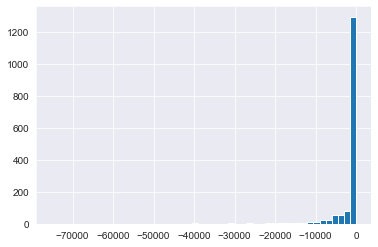

In [52]:
df["hospitaladmitoffset"].hist(bins=50) #all values are now positive

In [53]:
print(round(len(df)*0.005))
print(round(len(df)*0.01))
#we can index up to either of these values to get rid of the extreme 0.5% or 1% of values

8
16


In [54]:
df.quantile([0.005, 0.01,0.99,0.995]) 
#the values within these quantiles seem reasonable for quite a few of these numerical columns

,admissionheight,hospitaladmitoffset,hospitaldischargeyear,hospitaldischargeoffset,hospitaldischargestatus,unitvisitnumber,admissionweight,dischargeweight,unitdischargeoffset
0.005,109.0595,-30912.025,2014.0,178.825,0.0,1.0,37.85005,34.89300,76.510
0.010,140.0000,-22469.570,2014.0,305.600,0.0,1.0,39.77200,37.19300,170.300
0.990,193.0910,0.000,2015.0,46508.320,1.0,3.0,163.81400,164.62800,28048.390
0.995,196.0700,0.000,2015.0,58925.840,1.0,3.0,177.36650,179.24655,34153.205


Let's use the above quantiles to get rid of an appropriate amount of extreme outliers (which are probably wrong entries) from this dataframe.

In [55]:
admission_height = df["admissionheight"].sort_values().iloc[8:-8]
df = pd.concat([df.drop("admissionheight",axis=1),admission_height],axis=1)

In [56]:
hospitaladmitoffset = df["hospitaladmitoffset"].sort_values().iloc[16:]
df = pd.concat([df.drop("hospitaladmitoffset",axis=1),hospitaladmitoffset],axis=1)

In [57]:
hospitaldischargeoffset = df["hospitaldischargeoffset"].sort_values().iloc[:-16]
df = pd.concat([df.drop("hospitaldischargeoffset",axis=1),hospitaldischargeoffset],axis=1)

In [58]:
admissionweight = df["admissionweight"].sort_values().iloc[8:-8]
df = pd.concat([df.drop("admissionweight",axis=1),admissionweight],axis=1)

In [59]:
dischargeweight = df["dischargeweight"].sort_values().iloc[8:-8]
df = pd.concat([df.drop("dischargeweight",axis=1),dischargeweight],axis=1)

In [60]:
unitdischargeoffset = df["unitdischargeoffset"].sort_values().iloc[:-16]
df = pd.concat([df.drop("unitdischargeoffset",axis=1),unitdischargeoffset],axis=1)

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hospitaldischargeyear,1594.0,2014.522585,0.499646,2014.00,2014.0000,2015.000,2015.0,2015.0
hospitaldischargestatus,1594.0,0.910916,0.284954,0.00,1.0000,1.000,1.0,1.0
unitvisitnumber,1594.0,1.095985,0.370197,1.00,1.0000,1.000,1.0,5.0
admissionheight,1578.0,169.370653,10.787359,109.70,162.5150,170.000,177.8,196.0
hospitaladmitoffset,1578.0,-1308.581115,2952.706308,-22466.00,-663.2500,-219.000,-74.0,0.0
hospitaldischargeoffset,1578.0,7739.840304,7360.807123,69.00,2746.2500,5567.000,10006.5,46433.0
admissionweight,1578.0,82.721850,24.311274,37.87,65.2250,79.335,95.7,177.3
dischargeweight,1578.0,82.729159,25.412396,34.90,64.9325,78.750,97.2,179.2
unitdischargeoffset,1578.0,3473.450570,3864.610160,0.00,1269.2500,2305.500,4172.0,28015.0


In [62]:
df.isnull().sum().sort_values(ascending=False).head(6) 
#since we removed some entries for these 6 columns we now have null values.

unitdischargeoffset        16
admissionweight            16
hospitaldischargeoffset    16
hospitaladmitoffset        16
admissionheight            16
dischargeweight            16
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum().unique()

array([0], dtype=int64)

<div class="alert-success">
    
- Now we've somewhat normalized the data by removing extreme values from our numerical columns and taking care of null values.
- All we have left to do before we run our ML model is to deal with the object data entries.

In [65]:
df.select_dtypes("object").columns

Index(['gender', 'age', 'ethnicity', 'apacheadmissiondx',
       'hospitaladmittime24', 'hospitaladmitsource', 'hospitaldischargetime24',
       'hospitaldischargelocation', 'unittype', 'unitadmittime24',
       'unitadmitsource', 'unitstaytype', 'unitdischargetime24',
       'unitdischargelocation', 'unitdischargestatus'],
      dtype='object')

In [66]:
print(df["hospitaldischargelocation"].unique())
print("\n")
print(df["unitdischargelocation"].unique())
print("\n")
print(df["unitdischargestatus"].unique())
#we can't keep any columns in the dataset if they contain information about deaths
# therefore, we'll have to get rid of all of these columns to avoid data leakage

['Home' 'Other Hospital' 'Other' 'Skilled Nursing Facility' 'Death'
 'Rehabilitation' 'Nursing Home' 'Other External']


['Floor' 'Other External' 'Step-Down Unit (SDU)' 'Home' 'Other Hospital'
 'Other' 'Death' 'Other ICU' 'Skilled Nursing Facility' 'Rehabilitation'
 'Acute Care/Floor' 'ICU' 'Telemetry' 'Nursing Home' 'Other Internal']


['Alive' 'Expired']


In [67]:
df.drop(["hospitaldischargelocation","unitdischargelocation","unitdischargestatus"],axis=1,inplace=True)

In [68]:
df["apacheadmissiondx"].nunique() 
#there are lots of different unique conditions that are being described here
#let's see if we can narrow these down and get rid of any conditions which only appear once

198

In [69]:
df["apacheadmissiondx"].value_counts().sort_values(ascending=False).head(10)

Sepsis, pulmonary                                                                                     88
CHF, congestive heart failure                                                                         83
Diabetic ketoacidosis                                                                                 79
Rhythm disturbance (atrial, supraventricular)                                                         56
Emphysema/bronchitis                                                                                  49
Pneumonia, bacterial                                                                                  48
Infarction, acute myocardial (MI)                                                                     43
Sepsis, renal/UTI (including bladder)                                                                 43
CVA, cerebrovascular accident/stroke                                                                  36
Cardiac arrest (with or without respiratory arrest; for

In [70]:
(df["apacheadmissiondx"].value_counts()==1).sum()
#a fairly large number of entries only appear once in this entire dataset, these won't be of much use for our ML model

69

In [71]:
100 * (df["apacheadmissiondx"].value_counts()==1).sum()/df["apacheadmissiondx"].nunique() 
#these entries take up a decent percentage of the entire column
#we can use this information to filter our dataframe and reduce the amount of dimensions in our data

34.84848484848485

In [72]:
len(df)

1515

In [73]:
df = df[df['apacheadmissiondx'].map((df['apacheadmissiondx'].value_counts()) > 1)]

In [74]:
len(df) #as a consequence of filtering out our data, we've lost quite a few more columns

1446

In [75]:
apache_dummies = pd.get_dummies(df["apacheadmissiondx"],drop_first=True)

In [76]:
df = pd.concat([df.drop("apacheadmissiondx",axis=1),apache_dummies],axis=1)

Now that this column has been taken care of, let's transform all the timestamp columns by grabbing the hour attribute from them.

In [77]:
df["hospitaladmittime24"] = pd.to_datetime(df["hospitaladmittime24"]).apply(lambda x: x.hour)

In [78]:
df["hospitaldischargetime24"] = pd.to_datetime(df["hospitaldischargetime24"]).apply(lambda x: x.hour)

In [79]:
df["unitadmittime24"] = pd.to_datetime(df["unitadmittime24"]).apply(lambda x: x.hour)

In [80]:
df["unitdischargetime24"] = pd.to_datetime(df["unitdischargetime24"]).apply(lambda x: x.hour)

In [81]:
df.select_dtypes("object").columns
#for the rest of these columns we can get dummy variables fairly easily now

Index(['gender', 'age', 'ethnicity', 'hospitaladmitsource', 'unittype',
       'unitadmitsource', 'unitstaytype'],
      dtype='object')

In [82]:
dummies = pd.get_dummies(df[['gender', 'age', 'ethnicity', 'hospitaladmitsource', 'unittype',
       'unitadmitsource', 'unitstaytype']],drop_first=True)

In [83]:
df = df.drop(['gender', 'age', 'ethnicity', 'hospitaladmitsource', 'unittype',
       'unitadmitsource', 'unitstaytype'], axis=1)
df = pd.concat([df,dummies],axis=1)

In [84]:
len(df.columns)

254

<div class="alert-success">
We now have all of our data ready to feed into a NN!

### Building the Neural Network ###

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.drop("hospitaldischargestatus",axis=1).values
y = df["hospitaldischargestatus"].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [88]:
X_train.shape

(968, 253)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [94]:
model = Sequential()

model.add(Dense(253, activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [95]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=16,
          callbacks=[early_stop]
          )

Train on 968 samples, validate on 478 samples
Epoch 1/200
968/968 [==============================] - 2s 2ms/sample - loss: 0.3527 - val_loss: 0.2712
Epoch 2/200
968/968 [==============================] - 0s 442us/sample - loss: 0.3079 - val_loss: 0.2630
Epoch 3/200
968/968 [==============================] - 0s 480us/sample - loss: 0.2876 - val_loss: 0.2616
Epoch 4/200
968/968 [==============================] - 0s 402us/sample - loss: 0.2859 - val_loss: 0.2570
Epoch 5/200
968/968 [==============================] - 0s 401us/sample - loss: 0.2464 - val_loss: 0.2552
Epoch 6/200
968/968 [==============================] - 0s 396us/sample - loss: 0.2520 - val_loss: 0.2653
Epoch 7/200
968/968 [==============================] - 0s 449us/sample - loss: 0.2136 - val_loss: 0.2703
Epoch 8/200
968/968 [==============================] - 0s 447us/sample - loss: 0.2025 - val_loss: 0.2903
Epoch 9/200
968/968 [==============================] - 0s 422us/sample - loss: 0.1805 - val_loss: 0.3111
Epoch 10/20

In [96]:
model_loss = pd.DataFrame(model.history.history)
model_loss.iplot(title="Loss vs Epochs",xTitle="Epochs",yTitle="loss")

<div class="alert-warning">
Despite adding early callbacks and dropout layers, our model still appears to be overfitted.

### Evaluating Model Performance ###

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
predictions = model.predict_classes(X_test)

In [99]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[  9  30]
 [ 19 420]]


              precision    recall  f1-score   support

         0.0       0.32      0.23      0.27        39
         1.0       0.93      0.96      0.94       439

    accuracy                           0.90       478
   macro avg       0.63      0.59      0.61       478
weighted avg       0.88      0.90      0.89       478



<div class="alert-danger">

- Given that our numerical data had very little to no correlation between each other and that the data was VERY imbalanced, it isn't that surprising that our model didn't perform that well. 
- Considering that 90% of the values belonged to one class, a 90% accuracy statistic isn't a true reflection of our model performance.
- With an f1 score of only 0.27 for predictions of dead patients, our model was fairly unsuccessful overall.
- Let's see if a random forest classifier performs any better.

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier(n_estimators=100)

In [102]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
rfc_pred = rfc.predict(X_test)

In [104]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[  0  39]
 [  1 438]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        39
         1.0       0.92      1.00      0.96       439

    accuracy                           0.92       478
   macro avg       0.46      0.50      0.48       478
weighted avg       0.84      0.92      0.88       478



<div class="alert-info">
Our NN has definitely outperformed the random forest classifier, so it wasn't a total failure overall.